# Look inside CNN

- MNIST

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

## 0. Define Hyper-parameters and pre-set device on cuda

In [2]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Adjust Dataset classes and channels
num_classes = 10
in_channel = 1

# Hyper-parameters
batch_size = 50
max_pool_kernel = 2
learning_rate = 0.0001
num_epochs = 5

## 1. Load Data

In [3]:
train_data = torchvision.datasets.MNIST(root='./datasets',
                                        train=True,
                                        transform=transforms.ToTensor(),
                                        download=True)

test_data = torchvision.datasets.MNIST(root='./dataset',
                                       train=False,
                                       transform=transforms.ToTensor(),
                                       download=True)


## 2. Define Dataloader

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False)

## 3. Define Model

In [5]:
class ConvNetStep(nn.Module):
  def __init__(self, num_classes=10):
    super(ConvNetStep, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channel, out_channels=16, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=max_pool_kernel)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=max_pool_kernel)
    )
    self.fc1 = nn.Linear(in_features=7*7*32, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=num_classes)

  def forward1(self, x):
    x = self.layer1(x)
    return x
  
  def forward2(self, x):
    x = self.layer2(x)
    return x

  def forward3(self, x):
    x = x.reshape(x.size(0),-1)
    return self.fc1(x)

  def forward4(self, x):
    return self.fc2(x)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.fc1(x.reshape(x.size(0), -1))
    x = F.relu(x)
    x = F.softmax(self.fc2(x))
    return x



model = ConvNetStep()

### 3.1 Inside CNN

#### 3.1.0 Row Image (MNIST)

In [6]:
def image_show(tensor_image):
  image = tensor_image.reshape(tensor_image.size()[1], tensor_image.size()[2])
  imshow(image, cmap='gray')

images, labels = next(iter(train_loader))
image1, label1 = images[0], labels[0]
image2, label2 = images[1], labels[1]

Text(0.5, 1.0, 'tensor(1)')

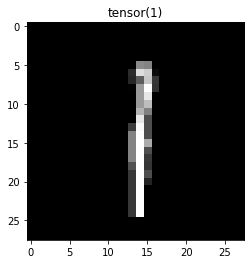

In [7]:
image_show(image1)
plt.title(label1)

Text(0.5, 1.0, 'tensor(2)')

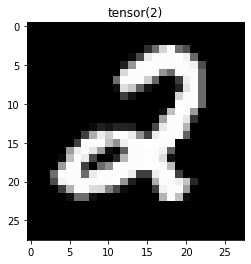

In [8]:
image_show(image2)
plt.title(label2)

#### 3.1.1 After 1st Convolution layer

- ConvNetStep의 layer1

In [9]:
output1 = model.forward1(images)
print(output1.size())

torch.Size([50, 16, 14, 14])


In [10]:
image1, image2 = output1[0], output1[1]
print(image1.size(), image2.size())

torch.Size([16, 14, 14]) torch.Size([16, 14, 14])


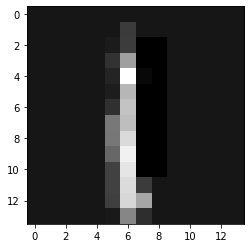

In [11]:
imshow(image1[0].detach().numpy(), cmap='gray')

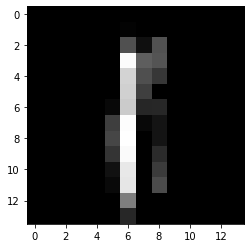

In [12]:
imshow(image1[1].detach().numpy(), cmap='gray')

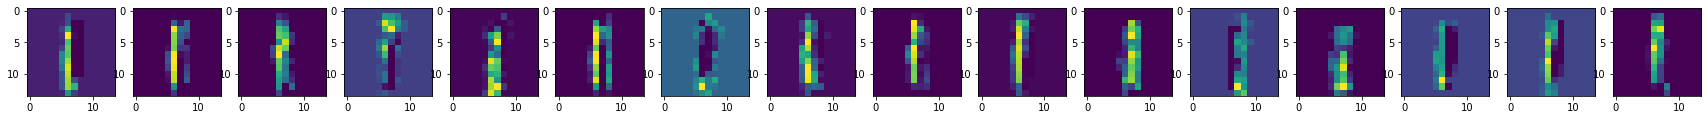

In [13]:
fig = plt.figure(figsize=(30,30))

for i in range(len(image1)):
  plt.subplot(1,len(image1),i+1)
  plt.imshow(image1[i].detach().numpy())

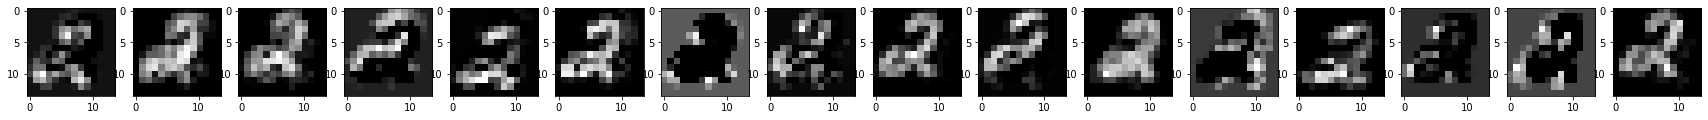

In [14]:
fig = plt.figure(figsize=(30,30))

for i in range(len(image2)):
  plt.subplot(1,len(image2),i+1)
  plt.imshow(image2[i].detach().numpy(), cmap='gray')

#### 3.1.2. After 2nd Convolution layer

- ConvNetStep의 layer2

In [15]:
output2 = model.forward2(output1)
print(output2.size())

torch.Size([50, 32, 7, 7])


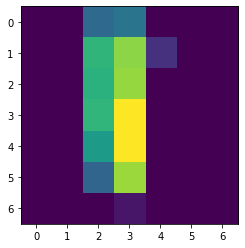

In [16]:
image1, image2 = output2[0], output2[1]

imshow(image1[0].detach().numpy())

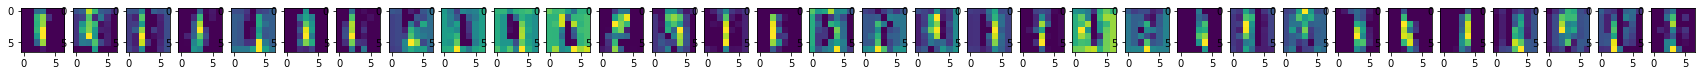

In [17]:
fig = plt.figure(figsize=(30,30))

for i in range(len(image1)):
  plt.subplot(1,len(image1),i+1)
  plt.imshow(image1[i].detach().numpy())

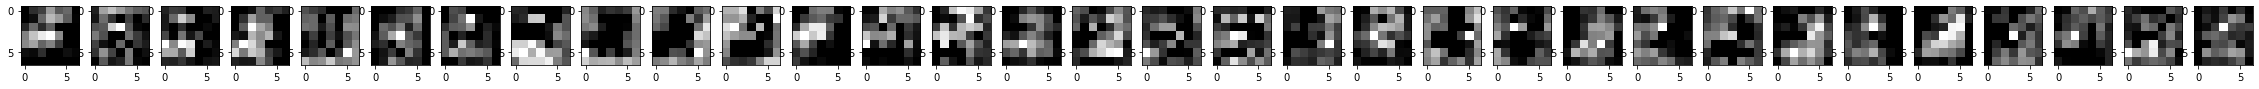

In [18]:
fig = plt.figure(figsize=(40,40))

for i in range(len(image2)):
  plt.subplot(1,len(image2),i+1)
  plt.imshow(image2[i].detach().numpy(), cmap='gray')

#### 3.4.3 After 3nd Fully Connected Layer

- ConvNetStep의 fc1

In [19]:
output3 = model.forward3(output2)
print(output3.size())

torch.Size([50, 120])


In [20]:
image1, image2 = output3[0], output3[1]

print(image1.size(), image2.size())

torch.Size([120]) torch.Size([120])


In [21]:
"""
  error : image1가 더 이상 2차원 tensor가 아님. (이미지로 show 불가)
"""
## imshow(image1[0].detach().numpy())

'\n  error : image1가 더 이상 2차원 tensor가 아님. (이미지로 show 불가)\n'

In [22]:
print(image1)

tensor([ 6.3353e-01,  3.2060e-01, -1.2248e-01, -8.6536e-01,  2.9791e-01,
         4.0785e-02, -8.1884e-01,  5.4665e-01,  5.9752e-01, -5.0363e-01,
        -7.3590e-02, -5.1591e-01, -5.8521e-01, -4.6615e-01, -1.7114e-02,
        -1.6695e-01, -1.2483e-01, -8.3991e-02, -4.5121e-01, -5.3994e-01,
        -1.4237e-01, -1.0304e+00, -3.0690e-01, -4.6102e-02, -4.3255e-01,
        -4.0252e-01, -6.1736e-01, -4.9756e-01, -2.2088e-02, -8.4288e-02,
         4.1282e-01,  3.0985e-01,  6.2590e-02,  7.0577e-02, -3.9088e-01,
        -4.7180e-01, -7.9996e-02, -5.6825e-01, -9.0998e-02,  9.2240e-01,
         9.7540e-03,  9.3154e-01,  1.3235e-01, -4.9477e-01,  8.8026e-03,
        -2.1202e-03, -7.3356e-01,  1.1070e-01,  2.1245e-02,  7.3157e-02,
         2.7392e-01,  3.8159e-01, -3.8586e-01,  5.5377e-02,  1.9538e-01,
         5.0202e-01,  1.7676e-01, -1.1137e-01, -1.7690e-01, -5.3892e-02,
        -1.8462e-01, -2.8044e-03,  5.7550e-02, -3.4433e-01, -1.2030e-01,
         3.8054e-02,  1.3123e-01, -6.3615e-01,  3.8

In [23]:
print(image2.detach().numpy())

[ 1.0860308   0.56637496 -1.3389617  -0.47323298  0.08821191 -0.19455492
 -0.45035186  0.80314744 -0.00405043 -0.5460633  -0.11619598  0.07372499
 -1.0843024  -0.22495067  0.7962939   0.741284   -0.64548016 -0.9812582
 -0.69236314 -0.72464645  0.32430735 -0.7457464  -0.34973407  0.11842921
  0.25484785  0.3209895   0.32406557 -0.61085343  0.01374152 -0.95002955
 -0.74785316  0.7903415  -0.405151    0.6912766  -1.44964    -0.93783563
 -0.26705128 -0.7335378   0.34563544  0.4506563  -0.07509111  0.56809646
  0.1056496  -1.1426518  -0.41859564 -0.39516366 -0.911476    1.6826961
 -0.22321     0.66104317  0.20267463  0.4563498  -0.6088253   0.84094834
  0.50235695 -0.20225438  0.4853004   0.32485628 -0.12563738  0.89975
  0.24368203  0.10769686  0.20664433  0.8105518  -0.8155383  -0.6726595
 -0.46892953 -0.81273097 -0.19031012  0.79100806  1.1241719  -0.2881948
 -0.386194   -0.24763072  0.68752307  0.15476531 -0.20911294 -0.5068932
  1.2573168  -0.4535139  -1.2386594   1.4125376   0.0580172

#### 3.4.4 After 4th Fully Connected Layer

- ConvNetStep의 fc4
- final result!

In [24]:
output4 = model.forward4(output3)
print(output4.shape)

torch.Size([50, 10])


In [25]:
image1, image2 = output4[0], output4[1]
print(image1.size())

torch.Size([10])


In [26]:
print("image1")
print("the final tensor :", image1)
print("the result:", image1.tolist().index(image1.max()))

image1
the final tensor : tensor([ 0.1845, -0.1534, -0.5420, -0.0581, -0.2190, -0.0749, -0.3822, -0.4309,
        -0.1077, -0.1756], grad_fn=<SelectBackward>)
the result: 0


In [27]:
print("image2")
print("the final tensor:", image2)
print("the result:", image2.tolist().index(image2.max()))

image2
the final tensor: tensor([ 0.0690, -0.4239, -0.0628,  0.4377,  0.6113, -0.0509, -0.1261, -0.4141,
        -0.6909, -0.8640], grad_fn=<SelectBackward>)
the result: 4


## 4. Set Loss & Optimizer

In [28]:
model = ConvNetStep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 4. Train

In [29]:
total_step = len(train_loader)

for epoch in range(num_epochs):
  for i, (img, label) in enumerate(train_loader):
    # Assign Tensors to Configures Devices (gpu)
    img = img.to(device)
    label = label.to(device)

    # Forward propagation
    outputs = model(img)

    # Get Loss, Compute Gradient, Update Parameters
    loss = criterion(outputs, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print Loss
    if i % 10000 == 0 or (i+1)==len(train_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/5], Step [1/1200], Loss: 2.3018
Epoch [1/5], Step [1200/1200], Loss: 1.5404
Epoch [2/5], Step [1/1200], Loss: 1.4863
Epoch [2/5], Step [1200/1200], Loss: 1.4643
Epoch [3/5], Step [1/1200], Loss: 1.4829
Epoch [3/5], Step [1200/1200], Loss: 1.4776
Epoch [4/5], Step [1/1200], Loss: 1.4779
Epoch [4/5], Step [1200/1200], Loss: 1.4636
Epoch [5/5], Step [1/1200], Loss: 1.4632
Epoch [5/5], Step [1200/1200], Loss: 1.4924


## 5. Save Model and Load Model to test

### 5.1 Save model

In [30]:
torch.save(model.state_dict(),"my_model.pth")

### 5.2 Load model

In [31]:
test_model = ConvNetStep().to(device)

test_model.load_state_dict(torch.load("my_model.pth"))

<All keys matched successfully>

In [32]:
test_model.eval()

with torch.no_grad():
  correct = 0
  
  for img, lab in test_loader:
    img = img.to(device)
    lab = lab.to(device)
    out = test_model(img)
    _, pred = torch.max(out.data, 1)
    correct += (pred == lab).sum().item()

  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / (len(test_loader) * batch_size)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 98.74%
